# Cancer PCA analysis

Gene expression levels have been measured for ~20,000 genes in ~800 patients, who have one of five different types of tumors: BRCA, KIRC, COAD, LUAD and PRAD. Is it possible to predict the type of tumor by considering the gene expression levels?

Use PCA to determine the linear combination of gene expression levels that allows the best separation of the five types of tumors. Save your work in the notebook, you will need it to complete the quiz on moodle later this Term.

So we have 801 patients, and left with 10266 genes. This time, the data is large, so do not form the  XTXXTX  matrix, but use SVD straight away. Do not forget to normalise the data first.
In this example, the tumor types are in a separate file, converted to numbers 1-5:

In [2]:
import numpy as np # First we load the Python library that helps with manipulating data
from pylab import * # import some shortcuts to plotting functionality

X = np.genfromtxt('cancer-gene-data2.csv', delimiter=',')
tumour = np.genfromtxt('cancer-gene-labels.csv', delimiter=',') 

print(X.shape)
print(tumour.shape)

(801, 10266)
(801,)


# Normalisation Function and Enumeration

In [3]:
# Creates a list of indicies for the tumour matrix with each number corresponding to each type of tumour respectively 
# BRCA, KIRC, COAD, LUAD and PRAD

BRCA = [index for index,value in enumerate(tumour) if value == 1]
KIRC = [index for index,value in enumerate(tumour) if value == 2]
COAD = [index for index,value in enumerate(tumour) if value == 3]
LUAD = [index for index,value in enumerate(tumour) if value == 4]
PRAD = [index for index,value in enumerate(tumour) if value == 5]


In [4]:
def normalise(x):
    ndata,ndim = x.shape # obtain the number of rows and columns
    m= x.sum(axis=0)     # compute the mean along each column, and collect it into a vector
    #print m
    x0 = x - m[np.newaxis,:]/ndata # subtract the mean divided by the number of rows from each element
                                   # the "np.newaxis" construct creates identical rows from the same mean value

    s = np.sqrt((x0**2).sum(axis=0)/ndata) # now compute the standard deviation of each column
    #print x
    #print s
    ss = np.array([ tmp if tmp != 0 else 1 for tmp in s]) # if the standard deviation is zero, replace it with 1
                                                       # to avoid division by zero error
    x00 = x0 / ss[np.newaxis,:]    # divide each element by the corresponding standard deviation
    return x00                     # return the normalised data matrix

In [5]:
X0 = normalise(X) # tumour is in a seperate array so normalise everything 
X0.sum(axis=0)

array([  9.53126467e-14,   2.27906582e-12,   1.92181826e-11, ...,
        -7.37132577e-13,  -4.09744461e-12,   1.91957561e-13])

All elements are basically zero, so assume normalised

# SVD

- X = U\*s\*V.T
- The diagonal entries of s are the square roots of the eigenvalues
- The Columns of U are the (normalised) eigenvectors of X*X.T
- The Columns of V are the (normalised) eigenvectors of X.T*X

(i.e. The matrices $U$ and $V$ contain the left and right singular vectors, and the array $s$ are the singular values)


In [6]:
U,s,V = np.linalg.svd(X0)

In [7]:
U.shape,s.shape,V.shape

((801, 801), (801,), (10266, 10266))

In [8]:
sing_vals = s**2
sing_vals[0:20]

array([ 854249.24365878,  701018.8281048 ,  634060.03563244,
        416039.89211685,  326676.68744356,  234975.20584682,
        192196.35461679,  175017.58126357,  132849.21705801,
         98255.99504568,   86328.25058384,   71582.70304234,
         68879.64881507,   60898.8821482 ,   53949.58803949,
         52230.81884832,   49828.90067321,   47636.44207685,
         43028.17325782,   41935.21208932])

Note how the order of the singular values is from largest to smallest. $V$ contains the singular vectors we are interested in, because the $V$ singular vectors are stored in rows of size 10266, which matches with the size of X0.

The SVD above doesn't put $U$ or $V$ in reduced form. The original dimensions generated a matrix with few instances/patients (N = 801) and a lot of genes/attributes per instance (M = 10266)

The orignial form has dimensions: N\*M = N\*N x N\*M x M\*M <br>
The reduced form would have dimensions: N\*M = N\*N x N\*N x N\*M

This means that the V.T matrix has a large number or redundent rows (right singular vectors) at the bottom of its matrix

# Eigenbasis

The possible types of tumour are: BRCA, KIRC, COAD, LUAD and PRAD

In [9]:
X_sing = np.zeros((801, 801)) #create square matrix of zeros
print(np.matmul(X0,V[1,:]).shape)
print(X0[:,:801].shape)
print(U[:,0].shape)
print(V[1,:].shape)

(801,)
(801, 801)
(801,)
(10266,)


## Right Singular Values

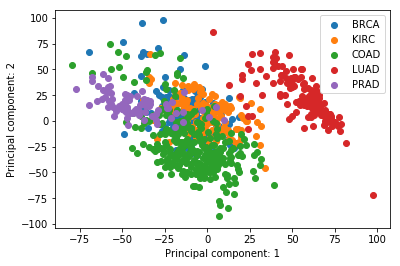

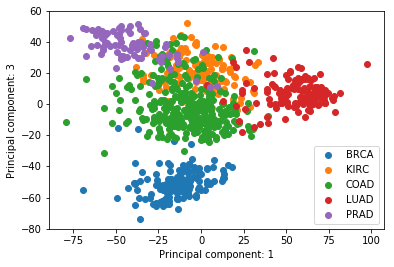

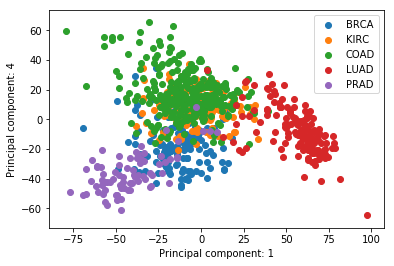

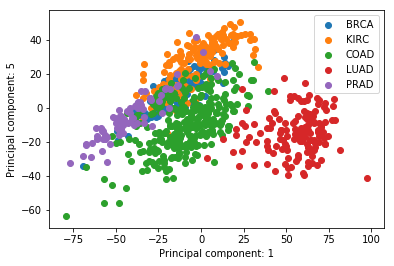

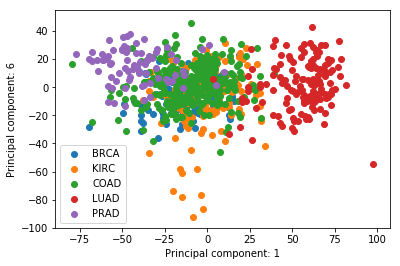

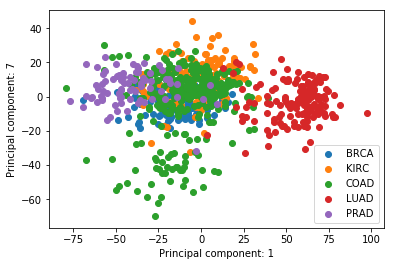

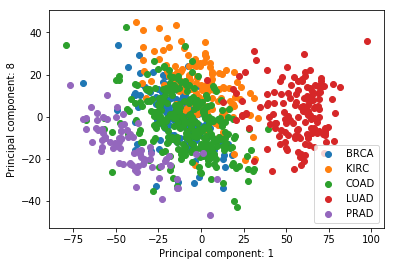

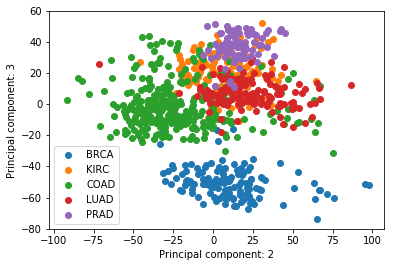

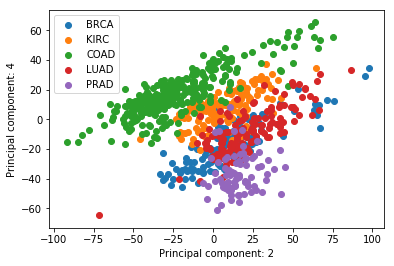

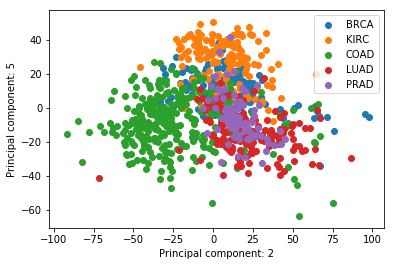

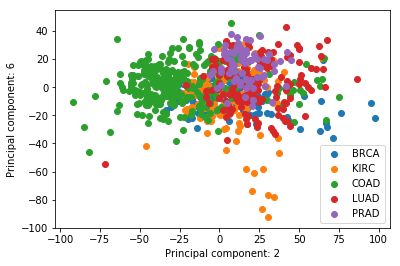

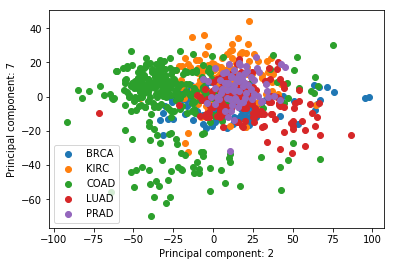

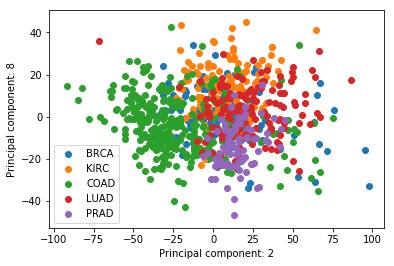

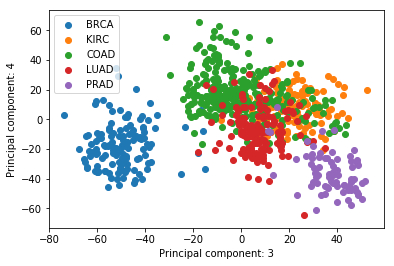

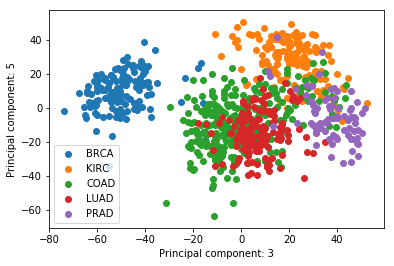

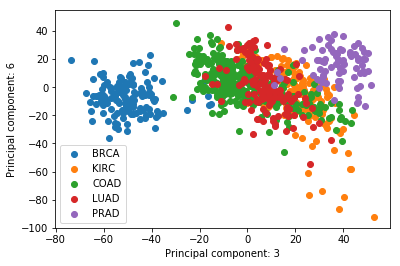

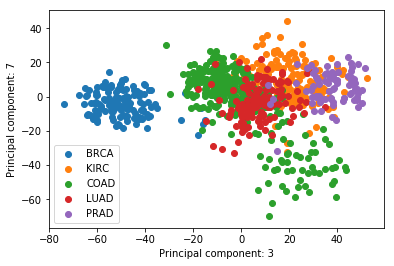

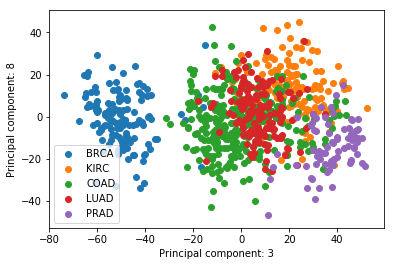

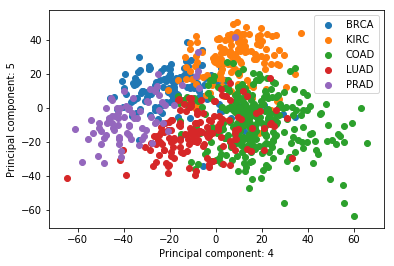

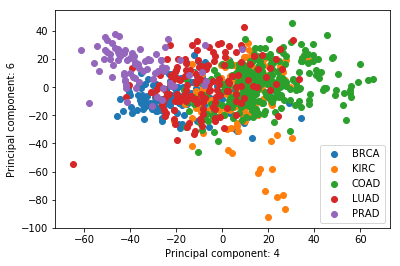

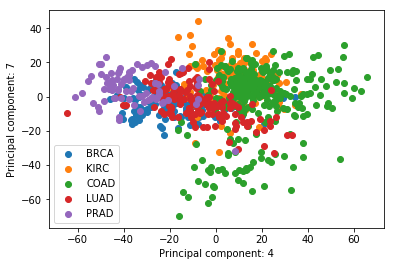

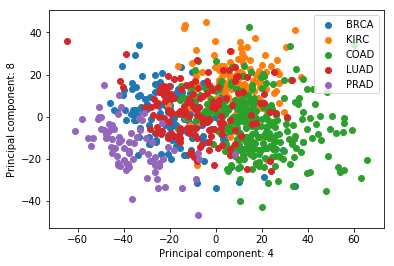

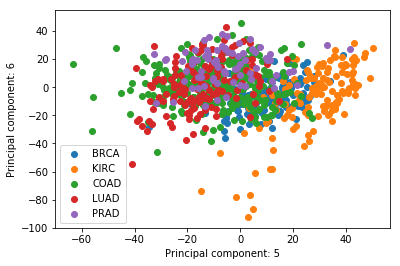

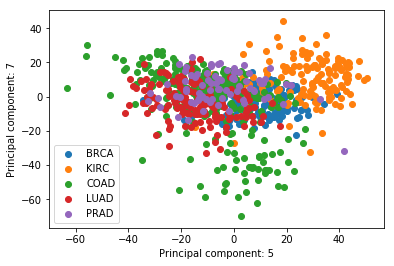

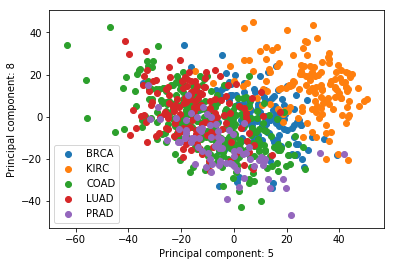

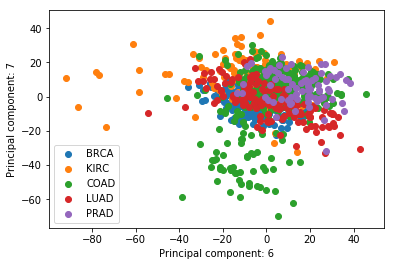

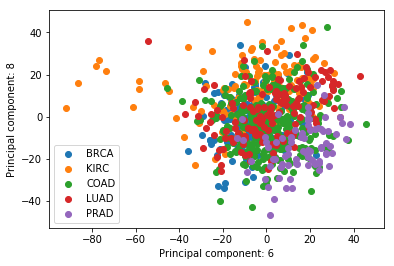

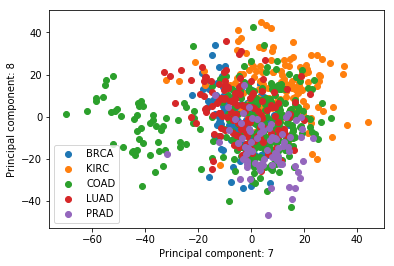

In [10]:
for n in range (0, 8):
    for i in range(n+1,8):   #plot every component up to N against every other one

        X_sing[n, :] = np.matmul(X0,V[n,:])
        X_sing[i, :] = np.matmul(X0,V[i,:])
        

        scatter(X_sing[n,BRCA], X_sing[i, BRCA])
        scatter(X_sing[n,KIRC], X_sing[i, KIRC])
        scatter(X_sing[n,COAD], X_sing[i, COAD])
        scatter(X_sing[n,LUAD], X_sing[i, LUAD])
        scatter(X_sing[n,PRAD], X_sing[i, PRAD])
        xlabel("Principal component: " + str(n+1))
        ylabel("Principal component: " + str(i+1))
        legend(["BRCA", "KIRC", "COAD", "LUAD", "PRAD"])
        plt.show()

A Quick Glance suggests that different eigenbasis are important for different types of tumour:

- 1 = LUAD (red)
- 2 = COAD (green)
- 3 = BRCA (blue)
- 4 = PRAD (purple)
- 5 = KIRC (orange)

Some plots separate these out more than others, and usually plotting the most significant eigenvalues (1 & 2) vs the others shows these relationships most strongly

note that the first 8 singular values are shown above. <br> They aren't *that* different between the nth and n+1th value. This means that separating data cleanly is difficult